In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from datetime import datetime

%matplotlib inline

In [2]:
data = pd.read_csv("csvs/days.csv", parse_dates=["time"])
data.set_index("time", inplace=True)

In [3]:
FPoS20_start_date = "2018-10-01 00:00:00"
fpos20_data = data.truncate(before=pd.Timestamp(FPoS20_start_date))

# Average PoW difficulty

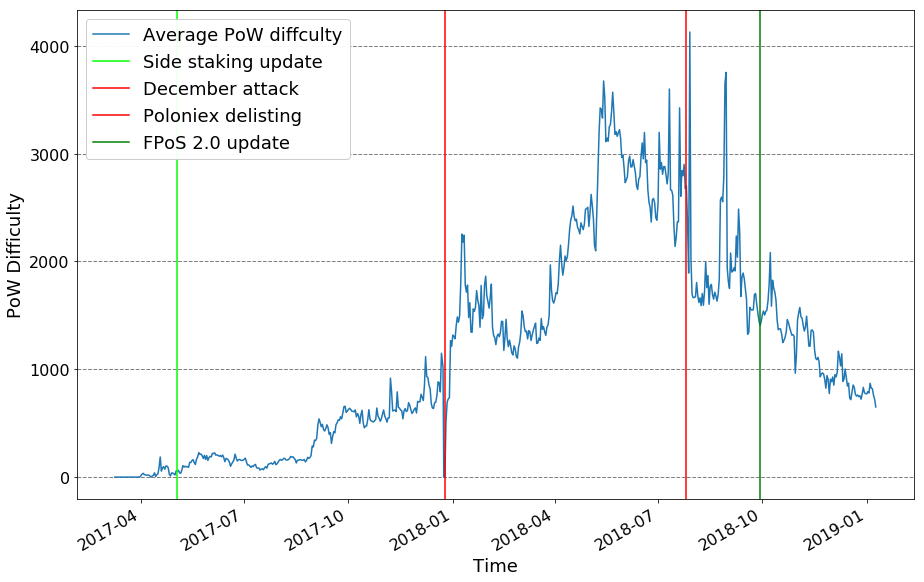

In [4]:
data.plot(
    y="avg_pow_difficulty",
    figsize=(15, 10),
    label="Average PoW diffculty"
)

ax = plt.gca()
ax.tick_params(axis="both", which="major", labelsize=24)
ax.tick_params(axis="both", which="major", labelsize=16)

ax.yaxis.grid(which="major", color="grey", linestyle="--", linewidth=1)

plt.xlabel("Time", fontsize=18)
plt.ylabel('PoW Difficulty', fontsize=18)

plt.axvline(x=datetime(2017, 5, 3), ymin=0, ymax=2, color="lime", label="Side staking update")
plt.axvline(x=datetime(2017, 12, 25), ymin=0, ymax=2, color="red", label="December attack")
plt.axvline(x=datetime(2018, 7,26), ymin=0, ymax=2, color="red", label="Poloniex delisting")
plt.axvline(x=datetime(2018, 9, 29), ymin=0, ymax=2, color="green", label="FPoS 2.0 update")

plt.legend(loc="upper left", framealpha=0.95, prop={"size": 18});

# Average PoS difficulty

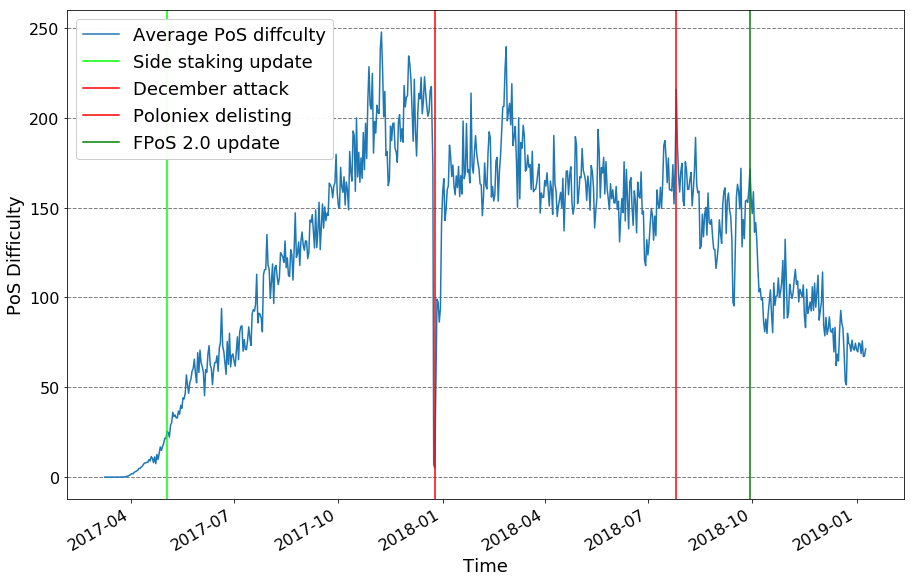

In [5]:
data.plot(
    y="avg_pos_difficulty",
    figsize=(15, 10),
    label="Average PoS diffculty"
)

ax = plt.gca()
ax.tick_params(axis="both", which="major", labelsize=24)
ax.tick_params(axis="both", which="major", labelsize=16)

ax.yaxis.grid(which="major", color="grey", linestyle="--", linewidth=1)

plt.xlabel("Time", fontsize=18)
plt.ylabel('PoS Difficulty', fontsize=18)

plt.axvline(x=datetime(2017, 5, 3), ymin=0, ymax=2, color="lime", label="Side staking update")
plt.axvline(x=datetime(2017, 12, 25), ymin=0, ymax=2, color="red", label="December attack")
plt.axvline(x=datetime(2018, 7,26), ymin=0, ymax=2, color="red", label="Poloniex delisting")
plt.axvline(x=datetime(2018, 9, 29), ymin=0, ymax=2, color="green", label="FPoS 2.0 update")

plt.legend(loc="upper left", framealpha=0.95, prop={"size": 18});

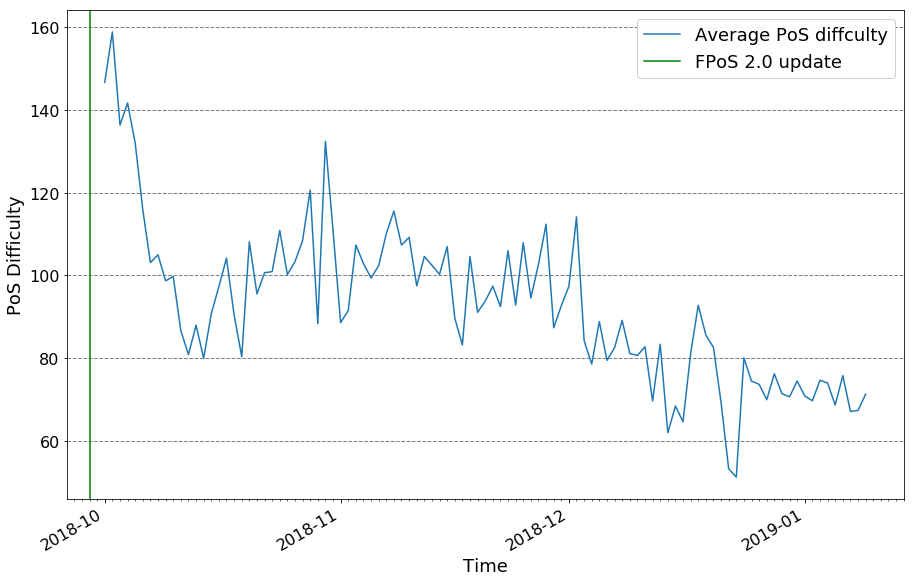

In [6]:
fpos20_data.plot(
    y="avg_pos_difficulty",
    figsize=(15, 10),
    label="Average PoS diffculty"
)

ax = plt.gca()

months = mdates.MonthLocator()  # every month
days = mdates.DayLocator()      # every day
monthsFmt = mdates.DateFormatter('%Y-%m')

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
ax.xaxis.set_minor_locator(days)

ax.tick_params(axis="both", which="major", labelsize=24)
ax.tick_params(axis="both", which="major", labelsize=16)

ax.yaxis.grid(which="major", color="grey", linestyle="--", linewidth=1)

plt.xlabel("Time", fontsize=18)
plt.ylabel('PoS Difficulty', fontsize=18)

plt.axvline(x=datetime(2018, 9, 29), ymin=0, ymax=2, color="green", label="FPoS 2.0 update")

plt.legend(loc="upper right", framealpha=0.95, prop={"size": 18});

# Average FPoS difficulty

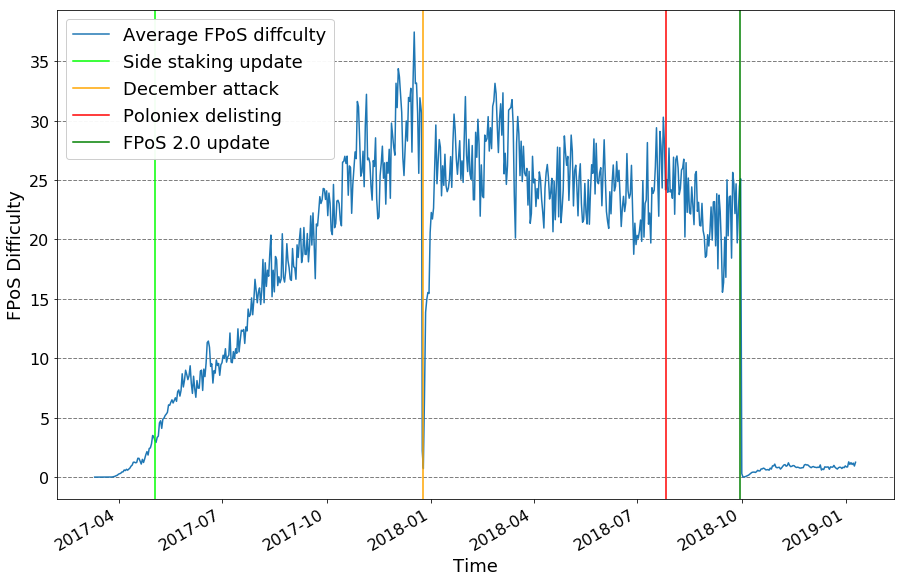

In [7]:
data[2:].plot(
    y="avg_fpos_difficulty",
    figsize=(15, 10),
    label="Average FPoS diffculty"
)

ax = plt.gca()
ax.tick_params(axis="both", which="major", labelsize=24)
ax.tick_params(axis="both", which="major", labelsize=16)

ax.yaxis.grid(which="major", color="grey", linestyle="--", linewidth=1)

plt.xlabel("Time", fontsize=18)
plt.ylabel('FPoS Difficulty', fontsize=18)

plt.axvline(x=datetime(2017, 5, 3), ymin=0, ymax=2, color="lime", label="Side staking update")
plt.axvline(x=datetime(2017, 12, 25), ymin=0, ymax=2, color="orange", label="December attack")
plt.axvline(x=datetime(2018, 7,26), ymin=0, ymax=2, color="red", label="Poloniex delisting")
plt.axvline(x=datetime(2018, 9, 29), ymin=0, ymax=2, color="green", label="FPoS 2.0 update")

plt.legend(loc="upper left", framealpha=0.95, prop={"size": 18});

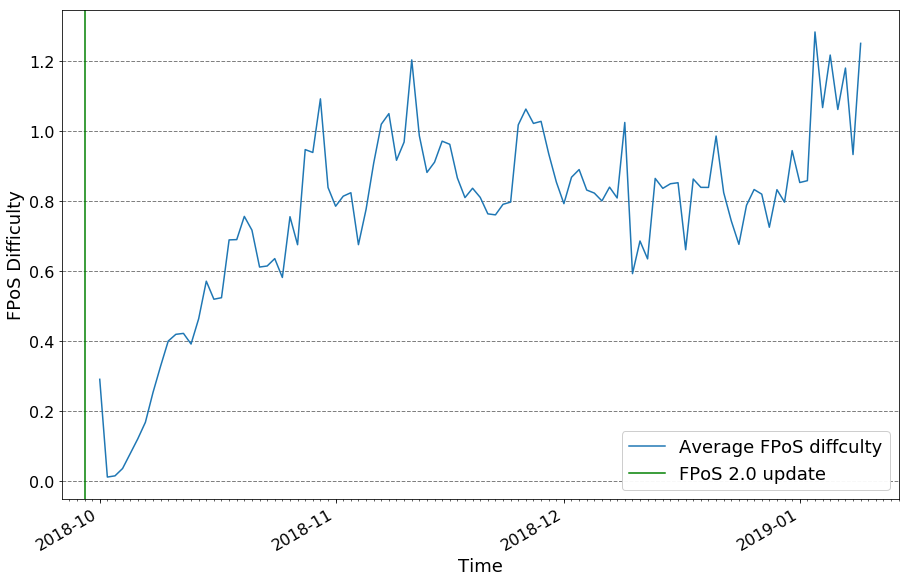

In [8]:
fpos20_data.plot(
    y="avg_fpos_difficulty",
    figsize=(15, 10),
    label="Average FPoS diffculty"
)

ax = plt.gca()

months = mdates.MonthLocator()  # every month
days = mdates.DayLocator()      # every day
monthsFmt = mdates.DateFormatter('%Y-%m')

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
ax.xaxis.set_minor_locator(days)

ax.tick_params(axis="both", which="major", labelsize=24)
ax.tick_params(axis="both", which="major", labelsize=16)

ax.yaxis.grid(which="major", color="grey", linestyle="--", linewidth=1)

plt.xlabel("Time", fontsize=18)
plt.ylabel('FPoS Difficulty', fontsize=18)

plt.axvline(x=datetime(2018, 9, 29), ymin=0, ymax=2, color="green", label="FPoS 2.0 update")

plt.legend(loc="lower right", framealpha=0.95, prop={"size": 18});

In [25]:
def plot_multi(data, cols=None, col_labels=None, spacing=.1, **kwargs):

    from pandas import plotting

    if cols is None: cols = data.columns
    if col_labels is None: cols = data.columns
    if len(cols) == 0: return
    colors = getattr(getattr(plotting, "_style"), "_get_standard_colors")(num_colors=len(cols))

    # First axis
    ax = data.loc[:, cols[0]].plot(label=col_labels[0], color=colors[0], **kwargs)
    ax.set_ylabel(ylabel=col_labels[0], fontsize=18)
    lines, labels = ax.get_legend_handles_labels()

    plt.xlabel("Time", fontsize=18)

    ax.tick_params(axis="both", which="major", labelsize=24)
    ax.tick_params(axis="both", which="major", labelsize=16)

    for n in range(1, len(cols)):
        ax_new = ax.twinx()
        ax_new.spines["right"].set_position(("axes", 1 + spacing*(n - 1)))
        data.loc[:, cols[n]].plot(ax=ax_new, label=col_labels[n], color=colors[n % len(colors)])
        ax_new.set_ylabel(ylabel=col_labels[n], fontsize=18)

        line, label = ax_new.get_legend_handles_labels()
        lines += line
        labels += label
        
        ax_new.tick_params(axis="both", which="major", labelsize=24)
        ax_new.tick_params(axis="both", which="major", labelsize=16)

    ax.legend(lines, labels, loc="lower center")

    months = mdates.MonthLocator()  # every month
    days = mdates.DayLocator()      # every day
    monthsFmt = mdates.DateFormatter("%Y-%m")

    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(monthsFmt)
    ax.xaxis.set_minor_locator(days)

    return ax

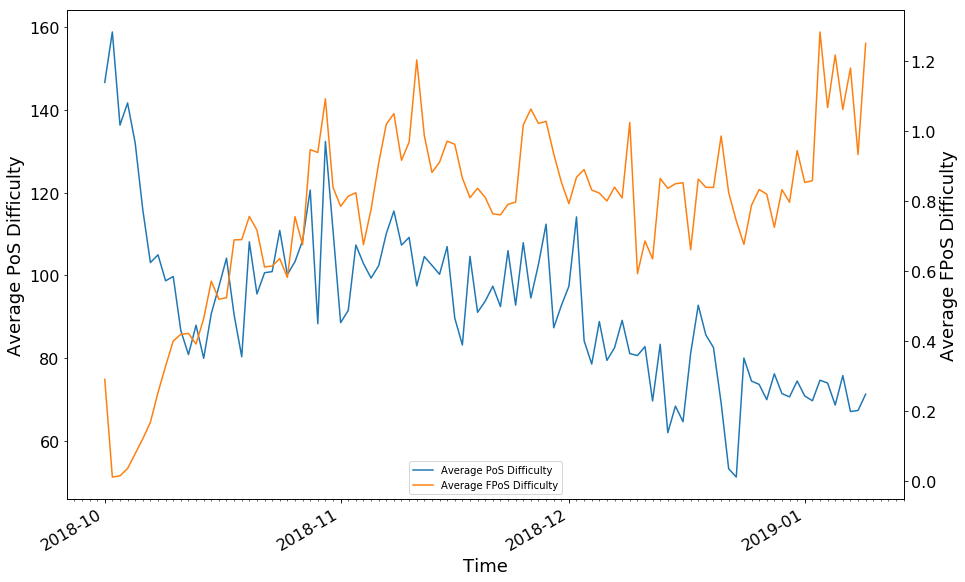

In [27]:
data = pd.DataFrame()

plot_multi(fpos20_data[["avg_pos_difficulty", "avg_fpos_difficulty"]],\
           col_labels=["Average PoS Difficulty", "Average FPoS Difficulty"], figsize=(15, 10));